Analyse Apartment or Entire Building 
 (apartment: ' a' , building: 'b') : b
Enter type of analyser 
 (monthly: 'm' , yearly: 'y') :  m
Enter Year : 2017
Enter Month : 6




Plot of Phase 1


TypeError: invalid type promotion

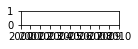

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from math import sqrt

warnings.simplefilter(action = 'ignore', category = FutureWarning)


def df_day(apart, yr_no, mnth_no, dy_no):
    df = pd.read_excel('vol_'+ apart +'.xlsx')
    df1 = df[df['year'] == yr_no]
    df2 = df1[df1['month'] == mnth_no]
    df3 = df2[df2['day'] == dy_no]
    return df3

def df_month(apart, yr_no, mnth_no):
    df = pd.read_excel('vol_'+ apart +'.xlsx')
    df1 = df[df['year'] == yr_no]
    df2 = df1[df1['month'] == mnth_no]
    return df2

def df_year(apart, yr_no):
    df = pd.read_excel('vol_'+ apart +'.xlsx')
    df1 = df[df['year'] == yr_no]
    return df1

apt_build = str(input("Analyse Apartment or Entire Building \n (apartment: ' a' , building: 'b') : "))
if(apt_build == 'a'):
    anlys_typ = str(input("Enter type of analyser \n (daily: 'd' , monthly: 'm' , yearly: 'y') :  ")) 

    if (anlys_typ == 'd'):
        apart_no = str(input('Enter Apartment No. : '))
        year_no = int(input('Enter Year : '))
        month_no = int(input('Enter Month : '))
        day_no = int(input('Enter Day : '))
        df_fin = df_day(apart_no, year_no, month_no, day_no)

    if (anlys_typ == 'm'):
        apart_no = str(input('Enter Apartment No. : '))
        year_no = int(input('Enter Year : '))
        month_no = int(input('Enter Month : '))
        df_fin = df_month(apart_no, year_no, month_no)

    if (anlys_typ == 'y'):
        apart_no = str(input('Enter Apartment No. : '))
        year_no = int(input('Enter Year : '))
        df_fin = df_year(apart_no, year_no)

    df_fin['tot_vol'] = (df_fin['V1'] + df_fin['V2'] + df_fin['V3']) / sqrt(3)

    v1_stat = str(df_fin.V1.dropna().empty)
    #v2_stat = str(df_fin.V2.dropna().empty)
    #v3_stat = str(df_fin.V3.dropna().empty)

    if (v1_stat == 'True'):
        print('\n No data available for graphical representation.')

    if (v1_stat == 'False'):

        col1 = np.where(df_fin.V1 < 240*0.94, 'k' ,np.where(df_fin.V1 > 240*1.06, 'k', 'y'))
        col2 = np.where(df_fin.V2 < 240*0.94 , 'k',np.where(df_fin.V2 > 240*1.06, 'k', 'y'))
        col3 = np.where(df_fin.V3 < 240*0.94 , 'k',np.where(df_fin.V3 > 240*1.06, 'k', 'y'))
        fig, axs = plt.subplots(3, sharex = True, sharey = True, figsize = (15,10))
        fig.suptitle('Voltage Profile Analysis (Apt '+ apart_no +')')
        axs[0].scatter(df_fin.date_time, df_fin.V1, c = col1, s = 4)
        axs[0].set(ylabel = 'V1')
        axs[1].scatter(df_fin.date_time, df_fin.V2, c = col2, s = 4)
        axs[1].set(ylabel = 'V2')
        axs[2].scatter(df_fin.date_time, df_fin.V3, c = col3, s = 4)
        axs[2].set(ylabel = 'V3')
        plt.show()

        col4 = np.where(df_fin.tot_vol < 415*0.94 , 'k',np.where(df_fin.tot_vol > 415*1.06, 'k', 'y'))
        fig = plt.figure(figsize = (15 , 5))
        plt.scatter(df_fin.date_time, df_fin.tot_vol, c = col4, s = 4) 
        plt.ylabel('Line')
        plt.show()

        print('\nBlack points indicate instances of undervoltage/ overvoltage. A voltage variation of +/- 6% is permissible')

    v1_prof = df_fin[['date_time', 'V1']]
    v2_prof = df_fin[['date_time', 'V2']]
    v3_prof = df_fin[['date_time', 'V3']]
    vt_prof = df_fin[['date_time', 'tot_vol']]

    v1_prof1 = v1_prof.loc[v1_prof['V1'] < 0.94*240]
    v1_prof2 = v1_prof.loc[v1_prof['V1'] > 1.06*240]
    v1_prof_fin = v1_prof1.append(v1_prof2)

    v2_prof1 = v2_prof.loc[v2_prof['V2'] < 0.94*240]
    v2_prof2 = v2_prof.loc[v2_prof['V2'] > 1.06*240]
    v2_prof_fin = v2_prof1.append(v2_prof2)

    v3_prof1 = v3_prof.loc[v3_prof['V3'] < 0.94*240]
    v3_prof2 = v3_prof.loc[v3_prof['V3'] > 1.06*240]
    v3_prof_fin = v3_prof1.append(v3_prof2)

    vt_prof1 = vt_prof.loc[vt_prof['tot_vol'] < 0.94*415]
    vt_prof2 = vt_prof.loc[vt_prof['tot_vol'] > 1.06*415]
    vt_prof_fin = vt_prof1.append(vt_prof2)

    df1 = v1_prof_fin.append(v2_prof_fin)
    df2 = df1.append(v3_prof_fin)
    df3 = df2.append(vt_prof_fin)
    v_stat = str(len(df3))

    print('\n')
    print('Undervoltage/Overvoltage instances table')

    if (v_stat == '0'):
        print('No instances found')
    else:
        if (str(len(v1_prof_fin)) == '0'):
            print('\n')
            print('For phase 1 :')
            print('No instances found')
        else:
            print('\n')
            print('For phase 1 :')
            print(v1_prof_fin.to_string(index = False))

        if (str(len(v2_prof_fin)) == '0'):
            print('\n')
            print('For phase 2 :')
            print('No instances found')
        else:
            print('\n')
            print('For phase 2 :')
            print(v2_prof_fin.to_string(index = False))

        if (str(len(v3_prof_fin)) == '0'):
            print('\n')
            print('For phase 3 :')
            print('No instances found')
        else:
            print('\n')
            print('For phase 3 :')
            print(v3_prof_fin.to_string(index = False))

        if (str(len(vt_prof_fin)) == '0'):
            print('\n')
            print('For Line Voltage :')
            print('No instances found')
        else:
            print('\n')
            print('For Line Voltage :')
            print(vt_prof_fin.to_string(index = False))

    desc = df_fin.describe()
    print('\n')
    print('Voltage Analysis')
    df_vol = desc
    for col in list(df_vol):
        if col in ['day','month','year']:
            df_vol = df_vol.drop(col,1)
    df_vol.rename(columns={'tot_vol':'Line Voltage'},inplace=True)
    df_vol = df_vol.transpose()        

    for col in list(df_vol):
        if col not in ['mean','min','max']:
            df_vol = df_vol.drop(col,1)
    df_vol = df_vol.fillna('NA')
    print(df_vol)

    print('\n')
    print('Smart Meter Analysis:')
    expd_read = len(df_fin)

    read_v1 = int(desc.at['count','V1'])
    read_v2 = int(desc.at['count','V2'])
    read_v3 = int(desc.at['count','V3'])
    print('Expected Readings :  '+ str(expd_read))
    print('Actual Readings (for Phase 1, 2 and 3) :  '+ str(read_v1))
    #print('Actual Readings (Phase 2) :  '+ str(read_v2))
    #print('Actual Readings (Phase 3) :  '+ str(read_v3))
    if expd_read == read_v1:
        print('Meter readings are Accurate')
    if expd_read != read_v1:
        print('Meter readings are missing. Readings were not found for '+ str(expd_read - read_v1) + ' out of ' + str(expd_read) + ' instances.')


if(apt_build == 'b'):
    df_fin={}
    Apts=[1,2,3,4,5,6,7,8,9,10,11,12,15,16,21,28,29,30,31,32,33,34,35,36,37,38]

    anlys_typ = str(input("Enter type of analyser \n (monthly: 'm' , yearly: 'y') :  "))

    '''if (anlys_typ == 'd'):
        year_no = int(input('Enter Year : '))
        month_no = int(input('Enter Month : '))
        day_no = int(input('Enter Day : '))
        for i in Apts:
            df_fin[i] = df_day(str(i), year_no, month_no, day_no)'''

    if (anlys_typ == 'm'):
        year_no = int(input('Enter Year : '))
        month_no = int(input('Enter Month : '))
        for i in Apts:
            df_fin[i] = df_month(str(i), year_no, month_no)

    if (anlys_typ == 'y'):
        year_no = int(input('Enter Year : '))
        for i in Apts:
            df_fin[i] = df_year(str(i), year_no)

    for i in Apts:
        df_fin[i]['tot_vol'] = (df_fin[i]['V1'] + df_fin[i]['V2'] + df_fin[i]['V3']) / sqrt(3)

    print('\n\n\n')
    print('Plot of Phase 1')
    fig = plt.figure()
    for i in Apts:
        col1 = np.where(df_fin[i].V1 < 240*0.94, 'k' ,np.where(df_fin[i].V1 > 240*1.06, 'k', 'y'))
        plt.subplot(13,3,i)
        plt.scatter(df_fin[i].date_time, df_fin[i].V1, c = col1, s = 3)
        plt.title('Apt'+str(i))
        plt.ylabel('V1')
    fig = plt.gcf()
    fig.set_size_inches(90, 180)
    plt.show()


    print('\n\n\n')
    print('Plot of Phase 2')
    fig = plt.figure()
    for i in Apts:
        col2 = np.where(df_fin[i].V2 < 240*0.94, 'k' ,np.where(df_fin[i].V2 > 240*1.06, 'k', 'y'))
        plt.subplot(13,3,i)
        plt.scatter(df_fin[i].date_time, df_fin[i].V2, c = col2, s = 3)
        plt.title('Apt'+str(i))
        plt.ylabel('V2')
    fig = plt.gcf()
    fig.set_size_inches(90, 180)
    plt.show()


    print('\n\n\n')
    print('Plot of Phase 3')
    fig = plt.figure()
    for i in Apts:
        col3 = np.where(df_fin[i].V3 < 240*0.94, 'k' ,np.where(df_fin[i].V3 > 240*1.06, 'k', 'y'))
        plt.subplot(13,3,i)
        plt.scatter(df_fin[i].date_time, df_fin[i].V3, c = col3, s = 3)
        plt.title('Apt'+str(i))
        plt.ylabel('V3')
    fig = plt.gcf()
    fig.set_size_inches(90, 180)
    plt.show()



    print('\n\n\n')
    print('Plot of Line Voltage')
    fig = plt.figure()
    for i in Apts:
        col4 = np.where(df_fin[i].tot_vol < 415*0.94, 'k' ,np.where(df_fin[i].tot_vol > 415*1.06, 'k', 'y'))
        plt.subplot(13,3,i)
        plt.scatter(df_fin[i].date_time, df_fin[i].tot_vol, c = col4, s = 3)
        plt.title('Apt'+str(i))
        plt.ylabel('Line Voltage')
    fig = plt.gcf()
    fig.set_size_inches(90, 180)
    plt.show()



    v1_prof = {}
    v1_prof1 = {}
    v1_prof2 = {}
    v1_prof_fin = {}

    v2_prof = {}
    v2_prof1 = {}
    v2_prof2 = {}
    v2_prof_fin = {}

    v3_prof = {}
    v3_prof1 = {}
    v3_prof2 = {}
    v3_prof_fin = {}

    vt_prof = {}
    vt_prof1 = {}
    vt_prof2 = {}
    vt_prof_fin = {}


    for i in Apts:
        v1_prof[i] = df_fin[i][['date_time', 'V1']]
        v2_prof[i] = df_fin[i][['date_time', 'V2']]
        v3_prof[i] = df_fin[i][['date_time', 'V3']]
        vt_prof[i] = df_fin[i][['date_time', 'tot_vol']]

        v1_prof1[i] = v1_prof[i].loc[v1_prof[i]['V1'] < 0.94*240]
        v1_prof2[i] = v1_prof[i].loc[v1_prof[i]['V1'] > 1.06*240]
        v1_prof_fin[i] = v1_prof1[i].append(v1_prof2[i])

        v2_prof1[i] = v2_prof[i].loc[v2_prof[i]['V2'] < 0.94*240]
        v2_prof2[i] = v2_prof[i].loc[v2_prof[i]['V2'] > 1.06*240]
        v2_prof_fin[i] = v2_prof1[i].append(v2_prof2[i])

        v3_prof1[i] = v3_prof[i].loc[v3_prof[i]['V3'] < 0.94*240]
        v3_prof2[i] = v3_prof[i].loc[v3_prof[i]['V3'] > 1.06*240]
        v3_prof_fin[i] = v3_prof1[i].append(v3_prof2[i])

        vt_prof1[i] = vt_prof[i].loc[vt_prof[i]['tot_vol'] < 0.94*415]
        vt_prof2[i] = vt_prof[i].loc[vt_prof[i]['tot_vol'] > 1.06*415]
        vt_prof_fin[i] = vt_prof1[i].append(vt_prof2[i])


    v1_df = pd.DataFrame()
    v2_df = pd.DataFrame()
    v3_df = pd.DataFrame()
    vt_df = pd.DataFrame()

    for i in Apts:
        v1_df = v1_df.append(v1_prof_fin[i])
        v2_df = v2_df.append(v2_prof_fin[i])
        v3_df = v3_df.append(v3_prof_fin[i])
        vt_df = vt_df.append(vt_prof_fin[i])


    v1_df['no of apts'] = 1
    v1_df = v1_df.groupby('date_time').sum()
    v1_df['date time'] = v1_df.index
    v1_df = v1_df.reset_index()
    v1_fin_df = v1_df[['date time','no of apts']]
    #print(v1_fin_df.to_string(index = False))

    #print('\n For Phase 2:')
    v2_df['no of apts'] = 1
    v2_df = v2_df.groupby('date_time').sum()
    v2_df['date time'] = v2_df.index
    v2_df = v2_df.reset_index()
    v2_fin_df = v2_df[['date time','no of apts']]
    #print(v2_fin_df.to_string(index = False))

    #print('\n For Phase 3:')
    v3_df['no of apts'] = 1
    v3_df = v3_df.groupby('date_time').sum()
    v3_df['date time'] = v3_df.index
    v3_df = v3_df.reset_index()
    v3_fin_df = v3_df[['date time','no of apts']]
    #print(v3_fin_df.to_string(index = False))

    #print('\n For Line Voltage:')
    vt_df['no of apts'] = 1
    vt_df = vt_df.groupby('date_time').sum()
    vt_df['date time'] = vt_df.index
    vt_df = vt_df.reset_index()
    vt_fin_df = vt_df[['date time','no of apts']]
    #print(vt_fin_df.to_string(index = False))
    
    df1 = v1_fin_df.append(v2_fin_df)
    df2 = df1.append(v3_fin_df)
    df3 = df2.append(vt_fin_df)
    v_stat = str(len(df3))

    print('\n')
    print('Undervoltage/Overvoltage instances table')

    if (v_stat == '0'):
        print('No instances found')
    else:
        if (str(len(v1_fin_df)) == '0'):
            print('\n')
            print('For phase 1 :')
            print('No instances found')
        else:
            print('\n')
            print('For phase 1 :')
            print(v1_fin_df.to_string(index = False))

        if (str(len(v2_fin_df)) == '0'):
            print('\n')
            print('For phase 2 :')
            print('No instances found')
        else:
            print('\n')
            print('For phase 2 :')
            print(v2_fin_df.to_string(index = False))

        if (str(len(v3_fin_df)) == '0'):
            print('\n')
            print('For phase 3 :')
            print('No instances found')
        else:
            print('\n')
            print('For phase 3 :')
            print(v3_fin_df.to_string(index = False))

        if (str(len(vt_fin_df)) == '0'):
            print('\n')
            print('For Line Voltage :')
            print('No instances found')
        else:
            print('\n')
            print('For Line Voltage :')
            print(vt_fin_df.to_string(index = False))

            

In [4]:
df_fin

,date_time,V1,V2,V3,day,month,year,time,tot_vol
0,2017-01-01 00:30:00,240.159088,242.765202,240.671326,1,1,2017,00:30:00,417.768124
1,2017-01-01 01:30:00,240.473567,242.895300,240.051731,1,1,2017,01:30:00,417.667077
2,2017-01-01 02:30:00,237.872454,239.860682,237.101458,1,1,2017,02:30:00,412.709945
3,2017-01-01 03:30:00,234.837778,235.901041,233.505846,1,1,2017,03:30:00,406.595847
4,2017-01-01 04:30:00,231.540706,233.743293,232.483078,1,1,2017,04:30:00,402.856010
5,2017-01-01 05:30:00,231.197183,233.819880,232.136724,1,1,2017,05:30:00,402.501927
6,2017-01-01 06:30:00,231.796776,234.256544,232.668455,1,1,2017,06:30:00,403.407205
7,2017-01-01 07:30:00,235.147169,236.691751,234.455018,1,1,2017,07:30:00,407.778995
8,2017-01-01 08:30:00,235.027625,237.517996,235.413609,1,1,2017,08:30:00,408.740452
9,2017-01-01 09:30:00,236.069738,238.347326,236.874228,1,1,2017,09:30:00,410.664219
